In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Basic overview

In [4]:
sleepdata= pd.read_csv('AutoSleep-20140411-to-20250521.csv')

sleepdata.head()

,ISO8601,fromDate,toDate,bedtime,waketime,inBed,awake,sessions,asleep,asleepAvg7,efficiency,efficiencyAvg7,REM,REMAvg7,deep,deepAvg7,sleepBPM,sleepBPMAvg7,dayBPM,dayBPMAvg7,wakingBPM,wakingBPMAvg7,hrv,hrvAvg7,sleepHRV,sleepHRVAvg7,respAvg,respMin,respMax
0,2023-08-14T20:59:59+01:00,"Sunday, 13 Aug 2023","Monday, 14 Aug 2023",14/08/2023 21:05,14/08/2023 22:00,00:55:00,00:00:00,1,05:35:00,05:35:00,609.1,609.1,01:34:00,01:34:00,00:12:30,00:12:30,102.2,102.2,79.1,79.1,83.0,83.0,64.0,64.0,46.0,65.0,NaN,NaN,NaN
1,2023-08-15T20:59:59+01:00,"Monday, 14 Aug 2023","Tuesday, 15 Aug 2023",15/08/2023 02:44,15/08/2023 10:16,07:32:00,00:00:00,1,07:32:00,06:33:30,100.0,354.5,NaN,NaN,NaN,NaN,53.6,77.9,66.8,75.0,53.0,68.0,64.0,64.0,49.0,62.0,17.1,13.5,20.0
2,2023-08-16T20:59:59+01:00,"Tuesday, 15 Aug 2023","Wednesday, 16 Aug 2023",16/08/2023 01:10,16/08/2023 13:00,11:50:00,01:02:00,1,07:20:00,06:49:00,62.0,257.0,01:59:30,01:46:45,01:03:00,00:37:45,63.6,73.1,99.9,81.2,73.0,69.7,56.0,61.0,41.0,60.0,16.9,15.0,19.0
3,2023-08-17T20:59:59+01:00,"Wednesday, 16 Aug 2023","Thursday, 17 Aug 2023",17/08/2023 02:15,17/08/2023 10:11,07:56:00,00:00:00,1,06:15:00,06:40:30,78.8,212.5,01:23:30,01:39:00,00:30:30,00:35:20,51.1,67.6,66.1,78.2,48.0,64.2,80.0,66.0,59.0,58.0,17.3,15.5,20.0
4,2023-08-18T20:59:59+01:00,"Thursday, 17 Aug 2023","Friday, 18 Aug 2023",18/08/2023 01:49,18/08/2023 11:46,09:57:00,00:35:00,1,06:37:30,06:39:54,66.6,183.3,01:38:00,01:38:45,00:39:30,00:36:22,52.3,64.6,68.0,76.5,50.0,61.4,136.0,80.0,57.0,58.0,17.3,15.0,22.0


In [5]:
## Some overall information 
sleepdata.describe()

,sessions,efficiency,efficiencyAvg7,sleepBPM,sleepBPMAvg7,dayBPM,dayBPMAvg7,wakingBPM,wakingBPMAvg7,hrv,hrvAvg7,sleepHRV,sleepHRVAvg7,respAvg,respMin,respMax
count,451.000000,451.000000,451.000000,451.000000,451.000000,367.000000,367.000000,451.000000,451.000000,429.000000,429.000000,425.000000,425.000000,413.000000,413.000000,413.000000
mean,1.157428,84.856098,86.697118,57.420399,57.620621,73.186376,73.557493,54.800222,54.947228,81.487179,81.400932,60.362353,60.423529,17.068765,14.136804,23.007264
std,0.388223,29.209356,31.013177,13.773192,10.988760,5.010413,3.180807,13.716646,8.779358,39.008242,16.530985,18.305337,7.190757,0.526499,1.412943,2.422326
min,1.000000,30.800000,66.400000,48.800000,50.300000,64.000000,69.000000,42.000000,48.000000,22.000000,50.000000,22.000000,46.000000,15.200000,7.500000,17.000000
25%,1.000000,74.850000,79.300000,51.800000,52.750000,70.600000,71.600000,49.000000,50.600000,59.000000,71.000000,49.000000,56.000000,16.800000,14.000000,21.000000
50%,1.000000,87.500000,83.700000,53.500000,54.000000,72.400000,73.000000,51.000000,51.900000,68.000000,77.000000,56.000000,59.000000,17.000000,14.500000,22.500000
75%,1.000000,95.800000,88.850000,55.400000,56.000000,74.800000,74.500000,53.000000,54.350000,88.000000,92.000000,67.000000,65.000000,17.400000,15.000000,24.500000
max,3.000000,609.100000,609.100000,123.500000,104.300000,108.400000,91.800000,156.000000,94.000000,251.000000,148.000000,173.000000,86.000000,19.600000,19.500000,31.500000


In [6]:
sleepdata.columns

Index(['ISO8601', 'fromDate', 'toDate', 'bedtime', 'waketime', 'inBed',
       'awake', 'sessions', 'asleep', 'asleepAvg7', 'efficiency',
       'efficiencyAvg7', 'REM', 'REMAvg7', 'deep', 'deepAvg7', 'sleepBPM',
       'sleepBPMAvg7', 'dayBPM', 'dayBPMAvg7', 'wakingBPM', 'wakingBPMAvg7',
       'hrv', 'hrvAvg7', 'sleepHRV', 'sleepHRVAvg7', 'respAvg', 'respMin',
       'respMax'],
      dtype='object')

In [7]:
running_avgs = [col for col in sleepdata.columns if 'Avg7' in col]
datetime_cols = ['ISO8601', 'fromDate', 'toDate', 'bedtime', 'waketime']
sleep_amounts = ['asleep', 'deep', 'REM']
other_cols = [col for col in sleepdata.columns if col not in running_avgs and col not in datetime_cols and col not in sleep_amounts]

max_length = max(len(running_avgs), len(datetime_cols), len(other_cols))

In [8]:
pd.DataFrame({
    'datetime_cols': datetime_cols + [''] * (max_length - len(datetime_cols)), 
    'sleep_amounts': sleep_amounts + [''] * (max_length - len(sleep_amounts)), 
    'running_avgs': running_avgs + [''] * (max_length - len(running_avgs)), 
    'other_cols': other_cols + [''] * (max_length - len(other_cols))
})

,datetime_cols,sleep_amounts,running_avgs,other_cols
0,ISO8601,asleep,asleepAvg7,inBed
1,fromDate,deep,efficiencyAvg7,awake
2,toDate,REM,REMAvg7,sessions
3,bedtime,,deepAvg7,efficiency
4,waketime,,sleepBPMAvg7,sleepBPM
5,,,dayBPMAvg7,dayBPM
6,,,wakingBPMAvg7,wakingBPM
7,,,hrvAvg7,hrv
8,,,sleepHRVAvg7,sleepHRV
9,,,,respAvg


Definition: 

- ISO 8601:  *is an international standard covering the worldwide exchange and communication of date and time-related data.* [Wiki](https://en.wikipedia.org/wiki/ISO_8601)
- BPM: heart rate/ beats per minute
    - lower rates are associated with better cardiovascular fitness and better recovery
    - higher rates can indicate stress 
- HRV: heart rate variability, or variation in time intervals between heartbeats
    - higher HRV : flexible, adaptive nervous system -> better rested 
    - lower HRV: possible sign of stress, fatigue, overtraining 
- Resp: respiration rate
    - high rates during sleep: possible disturbance during sleep

# Basic cleaning 

In [9]:
## Clean the date col 
sleepdata['date'] = pd.to_datetime(sleepdata['ISO8601'].str[:10])
sleepdata['date'].head()


0   2023-08-14
1   2023-08-15
2   2023-08-16
3   2023-08-17
4   2023-08-18
Name: date, dtype: datetime64[ns]

In [10]:
## Clean the day col 
sleepdata['dayBefore'] = sleepdata['fromDate'].str.split(',').str[0]
sleepdata['dayAfter'] = sleepdata['toDate'].str.split(',').str[0]


In [11]:
## cols that are in HH:MM:SS format 
# duration_cols_HHMMSS = [col for col in sleepdata.columns if ':' in col]
row_na_sums = sleepdata.isna().sum(axis = 1)
full_row_example = sleepdata[row_na_sums == 0].head(1)
full_row_example

hhmmss_cols = []

import re 
hhmmss_pattern = re.compile(r"^\d{2}:\d{2}:\d{2}$")
for col in full_row_example.columns:
    value = (full_row_example[col].values[0])
    if hhmmss_pattern.match(str(value)):
        # print(col)
        hhmmss_cols.append(col)

print(hhmmss_cols)

## convert these columns to in terms of minutes
full_row_example[hhmmss_cols]

['inBed', 'awake', 'asleep', 'asleepAvg7', 'REM', 'REMAvg7', 'deep', 'deepAvg7']


,inBed,awake,asleep,asleepAvg7,REM,REMAvg7,deep,deepAvg7
2,11:50:00,01:02:00,07:20:00,06:49:00,01:59:30,01:46:45,01:03:00,00:37:45


In [12]:
sleepdata[hhmmss_cols] = sleepdata[hhmmss_cols].fillna('00:00:00')

for hhmmss_col in hhmmss_cols:
    print(hhmmss_col)
    seconds = pd.to_numeric(sleepdata[hhmmss_col].str.split(':').str[-1])
    mins = pd.to_numeric(sleepdata[hhmmss_col].str.split(':').str[1])
    hours = pd.to_numeric(sleepdata[hhmmss_col].str.split(':').str[0])

    ## Convert to hours 
    sleepdata[hhmmss_col] = hours + mins/60 + seconds/(60*60)

    ## Is col numeric?
    print(sleepdata[hhmmss_col].dtype)

inBed
float64
awake
float64
asleep
float64
asleepAvg7
float64
REM
float64
REMAvg7
float64
deep
float64
deepAvg7
float64


### Singapore trips

In [13]:
# Convert string dates to Timestamp tuples
singapore_trips = [
    (pd.Timestamp('2025-03-17'), pd.Timestamp('2025-04-01')),  # recent wedding trip
    (pd.Timestamp('2024-12-09'), pd.Timestamp('2025-01-01')),  # 2024 dec trip
    (pd.Timestamp('2024-10-14'), pd.Timestamp('2024-11-03')),  # 2024 rom trip (fixed typo year)
    (pd.Timestamp('2024-03-16'), pd.Timestamp('2024-04-02')),  # 2024 march trip (fixed typo year)
]
def is_in_singapore(date, trips):
    return any(start <= date <= end for start, end in trips)

# Apply to your sleep dataframe
sleepdata['in_sg'] = sleepdata['date'].apply(lambda d: is_in_singapore(d, singapore_trips))


In [14]:
sleepdata_cleaned = sleepdata.drop(columns=['ISO8601', 'fromDate', 'toDate'])

# Distributions 

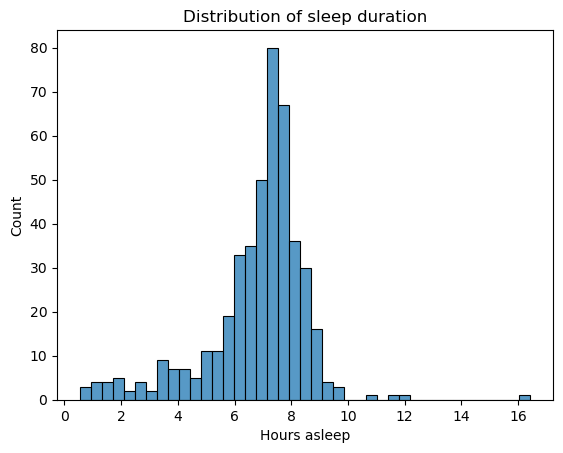

In [15]:
sns.histplot(sleepdata['asleep'])
plt.xlabel('Hours asleep')
plt.title('Distribution of sleep duration')
plt.show()

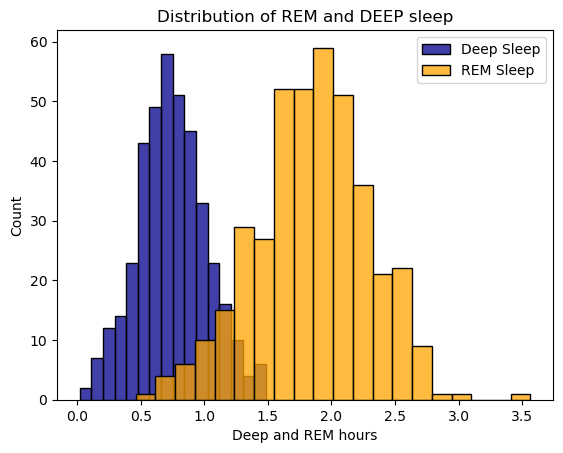

In [16]:
sns.histplot(sleepdata.deep[sleepdata.deep >0], color = 'darkblue', label = 'Deep Sleep')
sns.histplot(sleepdata.REM[sleepdata.REM > 0], color = 'orange', label = 'REM Sleep')
plt.legend(loc = 'upper right')
plt.xlabel('Deep and REM hours')
plt.title('Distribution of REM and DEEP sleep')
plt.show()

In [17]:
## Ratio of REM to Deep Sleep
rem_deep_ratio = (sleepdata.REM / sleepdata.deep)
rem_deep_ratio[rem_deep_ratio != np.inf].head()

0    7.520000
1         NaN
2    1.896825
3    2.737705
4    2.481013
dtype: float64

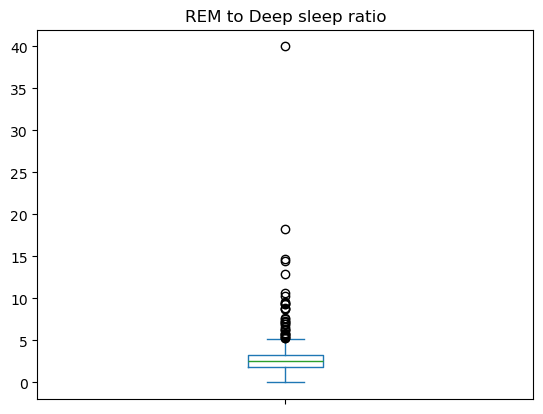

In [18]:
rem_deep_ratio[rem_deep_ratio != np.inf].plot(kind = 'box')
plt.title('REM to Deep sleep ratio')
plt.show()

In [19]:
## Anomalies -- high REM to deep sleep ratio
cols_of_interest = ['ISO8601', 'fromDate', 'asleep', 'REM', 'deep']
sleepdata[rem_deep_ratio > 10][cols_of_interest]

,ISO8601,fromDate,asleep,REM,deep
9,2023-08-23T20:59:59+01:00,"Tuesday, 22 Aug 2023",8.491667,1.875000,0.183333
202,2024-07-29T20:59:59+01:00,"Sunday, 28 Jul 2024",6.325000,2.258333,0.175000
275,2024-10-13T20:59:59+01:00,"Saturday, 12 Oct 2024",8.766667,2.133333,0.116667
284,2024-10-25T20:59:59+01:00,"Thursday, 24 Oct 2024",8.308333,2.683333,0.183333
289,2024-11-03T20:59:59Z,"Saturday, 2 Nov 2024",3.741667,1.300000,0.000000
295,2024-11-10T20:59:59Z,"Saturday, 9 Nov 2024",7.533333,1.958333,0.183333
336,2025-01-01T20:59:59Z,"Tuesday, 31 Dec 2024",7.175000,0.666667,0.016667
337,2025-01-02T20:59:59Z,"Wednesday, 1 Jan 2025",7.591667,2.658333,0.183333
402,2025-03-18T20:59:59Z,"Monday, 17 Mar 2025",6.950000,0.841667,0.000000


# Trends 

## Has my sleep improved over the years?

* Trend of sleep, deep and rem, over the years 
* Trend of sleep times and sleep patterns
    * Sleep disciple? (i.e. am I getting up consistently? Am I getting up late?)

In [20]:
sleepdata_cleaned.head()

,bedtime,waketime,inBed,awake,sessions,asleep,asleepAvg7,efficiency,efficiencyAvg7,REM,REMAvg7,deep,deepAvg7,sleepBPM,sleepBPMAvg7,dayBPM,dayBPMAvg7,wakingBPM,wakingBPMAvg7,hrv,hrvAvg7,sleepHRV,sleepHRVAvg7,respAvg,respMin,respMax,date,dayBefore,dayAfter,in_sg
0,14/08/2023 21:05,14/08/2023 22:00,0.916667,0.000000,1,5.583333,5.583333,609.1,609.1,1.566667,1.566667,0.208333,0.208333,102.2,102.2,79.1,79.1,83.0,83.0,64.0,64.0,46.0,65.0,NaN,NaN,NaN,2023-08-14,Sunday,Monday,False
1,15/08/2023 02:44,15/08/2023 10:16,7.533333,0.000000,1,7.533333,6.558333,100.0,354.5,0.000000,0.000000,0.000000,0.000000,53.6,77.9,66.8,75.0,53.0,68.0,64.0,64.0,49.0,62.0,17.1,13.5,20.0,2023-08-15,Monday,Tuesday,False
2,16/08/2023 01:10,16/08/2023 13:00,11.833333,1.033333,1,7.333333,6.816667,62.0,257.0,1.991667,1.779167,1.050000,0.629167,63.6,73.1,99.9,81.2,73.0,69.7,56.0,61.0,41.0,60.0,16.9,15.0,19.0,2023-08-16,Tuesday,Wednesday,False
3,17/08/2023 02:15,17/08/2023 10:11,7.933333,0.000000,1,6.250000,6.675000,78.8,212.5,1.391667,1.650000,0.508333,0.588889,51.1,67.6,66.1,78.2,48.0,64.2,80.0,66.0,59.0,58.0,17.3,15.5,20.0,2023-08-17,Wednesday,Thursday,False
4,18/08/2023 01:49,18/08/2023 11:46,9.950000,0.583333,1,6.625000,6.665000,66.6,183.3,1.633333,1.645833,0.658333,0.606111,52.3,64.6,68.0,76.5,50.0,61.4,136.0,80.0,57.0,58.0,17.3,15.0,22.0,2023-08-18,Thursday,Friday,False


## Sleep over the years: Duration

In [21]:
## Further cleaning -- remove extreme ends if we are just looking at general trends 
minsleep = 3; maxsleep = 12
general_trends = sleepdata_cleaned[(sleepdata_cleaned.asleep > minsleep) & (sleepdata_cleaned.asleep < maxsleep)]

In [22]:
# plt.figure(figsize=(14, 6))
good_sleep = sleepdata_cleaned[sleepdata_cleaned['asleep'] >= 6]
bad_sleep = sleepdata_cleaned[sleepdata_cleaned['asleep'] < 6]
# plt.plot(good_sleep['date'], good_sleep['asleep'], marker='o', linestyle='', color='green')
# plt.plot(bad_sleep['date'], bad_sleep['asleep'], marker='o', linestyle='', color='red')
# plt.title("SLEEP DURATION OVER TIME")
# plt.xlabel("Date")
# plt.ylabel("Minutes Asleep")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


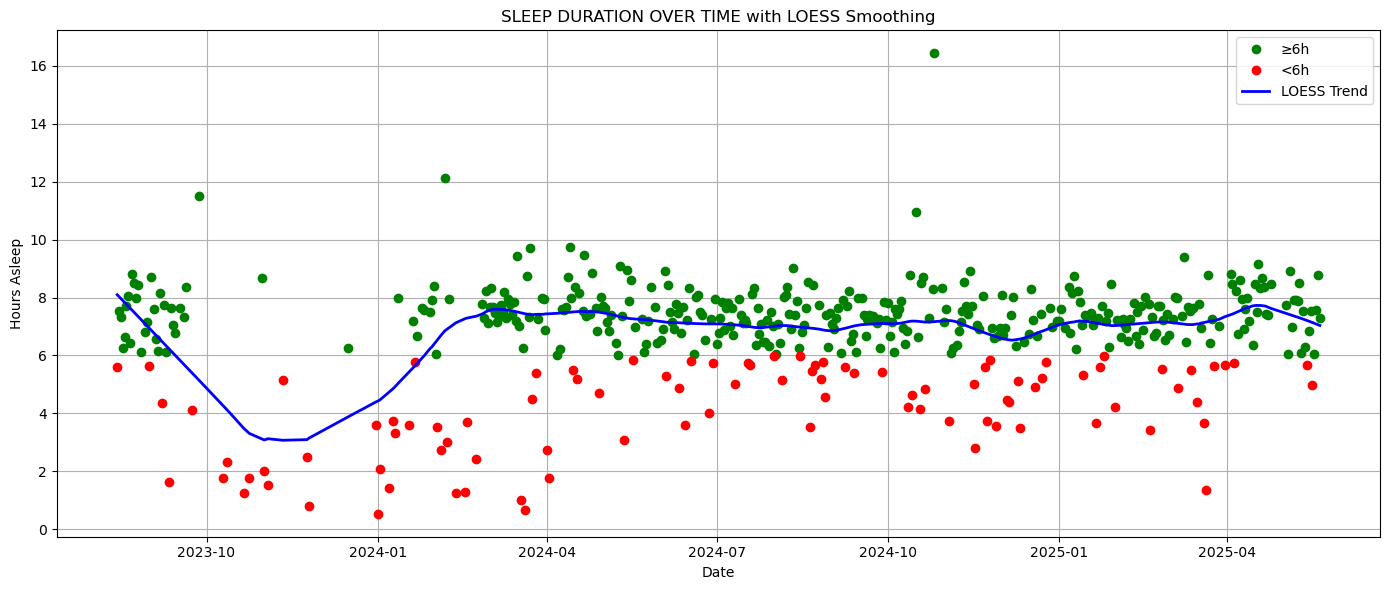

In [23]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt

# Clean and sort
sleep_sorted = sleepdata_cleaned[['dayBefore', 'date', 'asleep', 'deep', 'REM']].dropna().sort_values('date').copy()

# Convert date to numeric (days since first date)
sleep_sorted['days_since_start'] = (sleep_sorted['date'] - sleep_sorted['date'].min()).dt.days

# Apply LOWESS smoothing
smoothed = lowess(endog=sleep_sorted['asleep'], exog=sleep_sorted['days_since_start'], frac=.1)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(good_sleep['date'], good_sleep['asleep'], marker='o', linestyle='', color='green', label='≥6h')
plt.plot(bad_sleep['date'], bad_sleep['asleep'], marker='o', linestyle='', color='red', label='<6h')
plt.plot(sleep_sorted['date'], smoothed[:, 1], color='blue', linewidth=2, label='LOESS Trend')

plt.title("SLEEP DURATION OVER TIME with LOESS Smoothing")
plt.xlabel("Date")
plt.ylabel("Hours Asleep")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


On average, about 7 hours of sleep

## Insufficient sleep: less than 6 hours

In [24]:
## Rate of little sleep:
sleepdata_cleaned['lessThan6'] = sleepdata_cleaned.asleep<6

sleepdata_cleaned['month_label'] = pd.to_datetime(sleepdata_cleaned['date']).dt.strftime('%b %Y')

## Find frequency of bad sleeps each month 
monthly_little_sleep = sleepdata_cleaned.groupby('month_label')['lessThan6'].sum().reset_index().rename(columns= {'lessThan6': 'No Nights <6 hrs sleep'})

## Monthly mean 
monthly_little_sleep_mean = monthly_little_sleep['No Nights <6 hrs sleep'].mean()

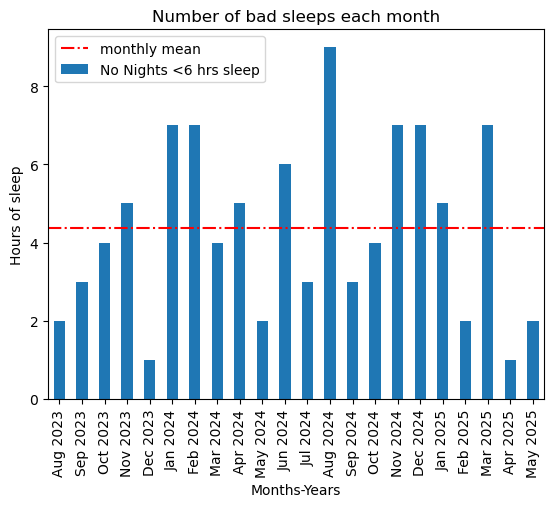

In [25]:
monthly_little_sleep['month_dt'] = pd.to_datetime(monthly_little_sleep['month_label'], format= '%b %Y')
monthly_little_sleep.sort_values('month_dt')[['month_label', 'No Nights <6 hrs sleep']].reset_index(drop= True).set_index('month_label').plot(kind = 'bar')
plt.axhline(y = monthly_little_sleep_mean, color = 'r', linestyle = 'dashdot',
            label = 'monthly mean')
plt.legend()
plt.title('Number of bad sleeps each month')
plt.xlabel('Months-Years')
plt.ylabel('Hours of sleep')
plt.show()

### Rate of bad sleep

In [26]:
## Average rate of bad sleep
print(f'Average rate of bad sleep: {sleepdata_cleaned.lessThan6.sum()/len(sleepdata_cleaned) * 100:.0f}%')
print(f'1 in every {len(sleepdata_cleaned)/sleepdata_cleaned.lessThan6.sum():.0f} sleep will be insufficient')

Average rate of bad sleep: 21%
1 in every 5 sleep will be insufficient


## Sleep over the years: Deep and REM

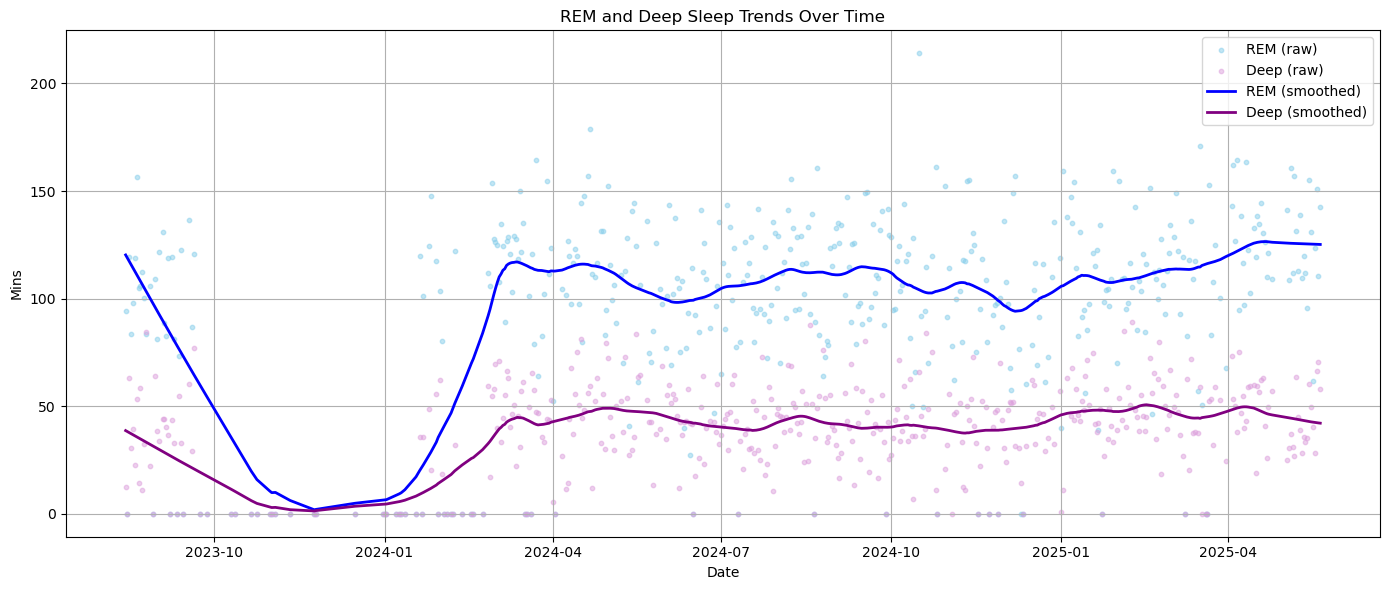

In [27]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14, 6))

sleep_sorted['REM_mins'] = sleep_sorted['REM']*60
sleep_sorted['deep_mins'] = sleep_sorted['deep']*60
## Continue with sleep sorted

## Get smoothed trends 
smoothed_rem = lowess(endog = sleep_sorted['REM_mins'], exog= sleep_sorted.days_since_start, 
                      frac = 0.1)
smoothed_deep = lowess(endog = sleep_sorted['deep_mins'], exog= sleep_sorted.days_since_start,
                       frac= 0.1)

# Raw points
plt.scatter(sleep_sorted['date'], sleep_sorted['REM_mins'], color='skyblue', alpha=0.5, label='REM (raw)', s=10)
plt.scatter(sleep_sorted['date'], sleep_sorted['deep_mins'], color='plum', alpha=0.5, label='Deep (raw)', s=10)

# Smoothed trend lines
plt.plot(sleep_sorted['date'], smoothed_rem[:, 1], color='blue', label='REM (smoothed)', linewidth=2)
plt.plot(sleep_sorted['date'], smoothed_deep[:, 1], color='purple', label='Deep (smoothed)', linewidth=2)

plt.title("REM and Deep Sleep Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Mins")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
## Take averages post May-2024
past_may_2024 = sleep_sorted['date'] > '2024-04-01'
smoothed_deep_mins_pastmay2024 = smoothed_deep[:,1][past_may_2024]
smoothed_rem_mins_pastmay2024 = smoothed_rem[:,1][past_may_2024]



In [29]:
## See averages 
avg_deep_mins = round(smoothed_deep_mins_pastmay2024.mean(),2)
avg_rem_mins = round(smoothed_rem_mins_pastmay2024.mean(),2)
avg_rem_deep_ratio = round(avg_rem_mins/avg_deep_mins
,2)
pd.DataFrame({'avg_deep_mins': avg_deep_mins, 
              'avg_REM_mins': avg_rem_mins, 
              'avg_ratio': avg_rem_deep_ratio}, index=[1])

,avg_deep_mins,avg_REM_mins,avg_ratio
1,43.71,110.05,2.52


## Daily trend 

In [30]:
## Ordering days 
from pandas.api.types import CategoricalDtype

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
sleep_sorted['dayBefore'] = sleep_sorted['dayBefore'].astype(cat_type)

In [31]:
sleep_sorted.groupby('dayBefore').agg({
    'asleep':'mean', 
    'deep_mins':'mean',
    'REM_mins':'mean'
}, observe = False).sort_index()

C:\Users\itan_amelco\AppData\Local\Temp\ipykernel_25940\2825616219.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_sorted.groupby('dayBefore').agg({


,asleep,deep_mins,REM_mins
dayBefore,,,
Monday,6.766169,37.910448,89.820896
Tuesday,6.925613,40.044118,102.250000
Wednesday,6.737109,42.882812,99.000000
Thursday,6.674359,41.776923,95.661538
Friday,6.967298,37.454545,100.545455
Saturday,6.871186,38.584746,94.372881
Sunday,6.478091,36.951613,100.153226


In [32]:
## Combine REM and deep sleep - have to first reshape
def reshape(sleep_sorted):
    rem_only = sleep_sorted[['dayBefore', 'REM_mins']].rename(columns={'REM_mins':'mins'})
    rem_only['type'] = 'REM'
    deep_only = sleep_sorted[['dayBefore', 'deep_mins']].rename(columns={'deep_mins':'mins'})
    deep_only['type'] = 'deep'

    combined = pd.concat([rem_only, deep_only])
    return combined

df_long = reshape(sleep_sorted)
df_long.sample(5, random_state=2)

,dayBefore,mins,type
384,Monday,59.5,deep
402,Monday,50.5,REM
169,Saturday,109.0,REM
230,Monday,80.5,REM
157,Sunday,36.5,deep


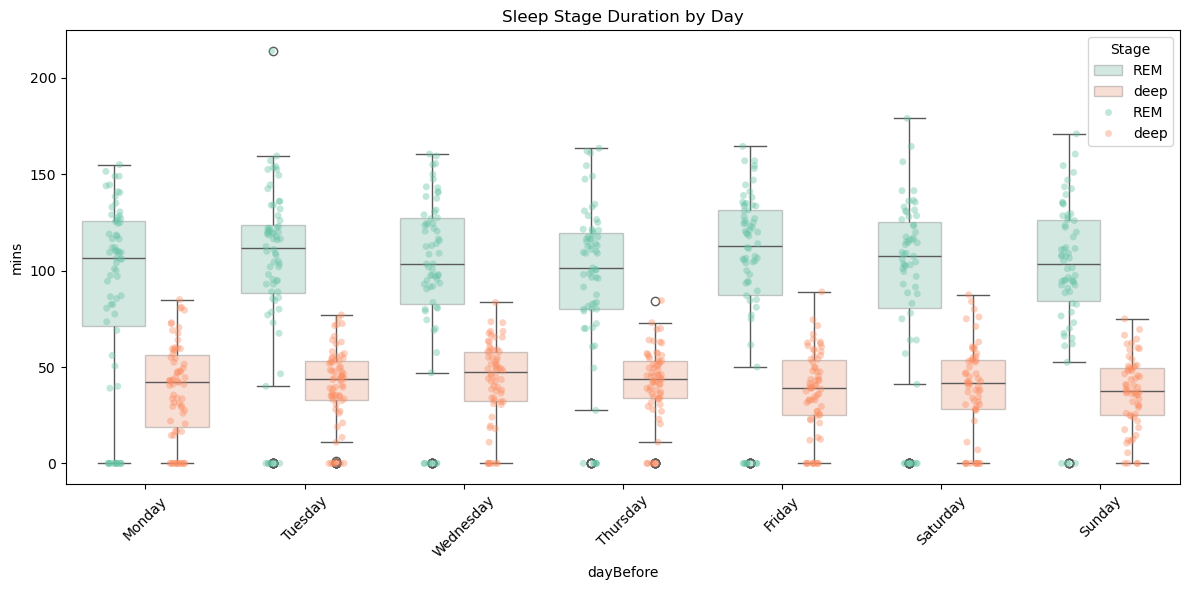

In [33]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df_long, x='dayBefore', y='mins', hue='type', palette='Set2', boxprops=dict(alpha=0.3))
sns.stripplot(data=df_long, x='dayBefore', y='mins', hue='type', dodge=True, alpha=0.4, palette='Set2')
plt.title('Sleep Stage Duration by Day')
plt.legend(title='Stage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlations

## Between sleep types

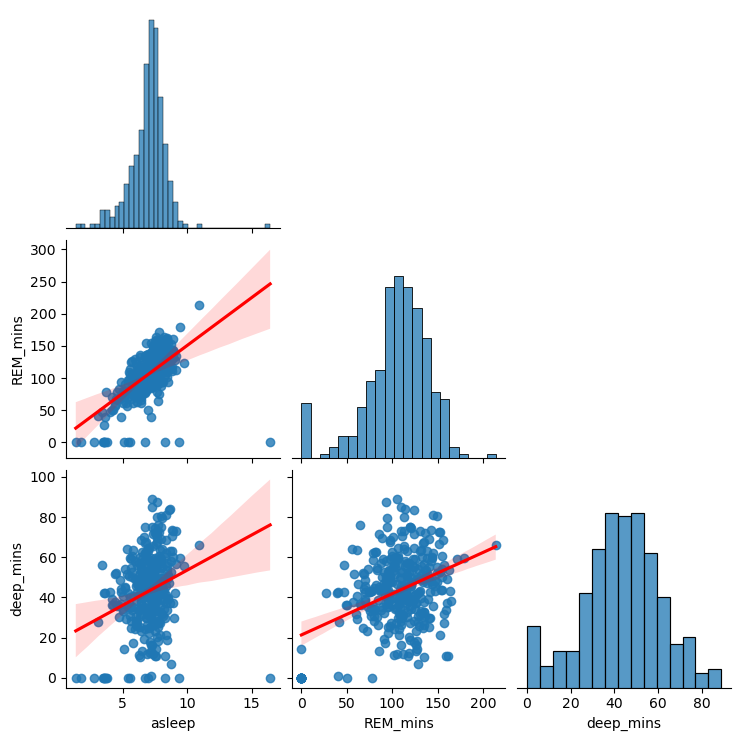

In [34]:
sleeps = sleep_sorted[['asleep', 'REM_mins', 'deep_mins']][past_may_2024]
sns.pairplot(sleeps, kind = 'reg', plot_kws={'line_kws':{'color':'red'}}, corner = True)

## How does time of sleep affect sleep types?

In [35]:
sleepdata_cleaned.head()
sleepdata_cleaned['REM_mins'] = sleepdata_cleaned['REM']*60
sleepdata_cleaned['deep_mins'] = sleepdata_cleaned['deep']*60



In [36]:
## extract time 
sleepdata_cleaned['bedTime'] = pd.to_datetime(sleepdata_cleaned.bedtime, format= '%d/%m/%Y %H:%M')
sleepdata_cleaned['bedTime'].head()
sleepdata_cleaned['bed_hour'] = sleepdata_cleaned['bedTime'].dt.hour + sleepdata_cleaned['bedTime'].dt.minute / 60


## reformat time falling asleep to : HOURS PAST 9PM
starting_time = "21:00"

sleepdata_cleaned['bedTime_hours_past_9pm'] = (sleepdata_cleaned.bed_hour - int(starting_time.split(':')[0])) % 24
sleepdata_cleaned['bedTime_hours_past_9pm'].head()

0    0.083333
1    5.733333
2    4.166667
3    5.250000
4    4.816667
Name: bedTime_hours_past_9pm, dtype: float64

In [37]:
tick_positions = list(range(0,10))  # 0 to 12 hours past 8 PM
## starting time is 9pm 
tick_labels = [(pd.Timestamp(starting_time) + pd.Timedelta(hours=i)).strftime('%#I %p') for i in tick_positions]


In [38]:
## Further cleaning: remove SG trips, remove anomalies (10 hours past 9pm)
sleepdata_cleaned_no_trips = sleepdata_cleaned[~sleepdata_cleaned.in_sg]
sleepdata_cleaned_no_trips = sleepdata_cleaned_no_trips[sleepdata_cleaned_no_trips['bedTime_hours_past_9pm']<10]


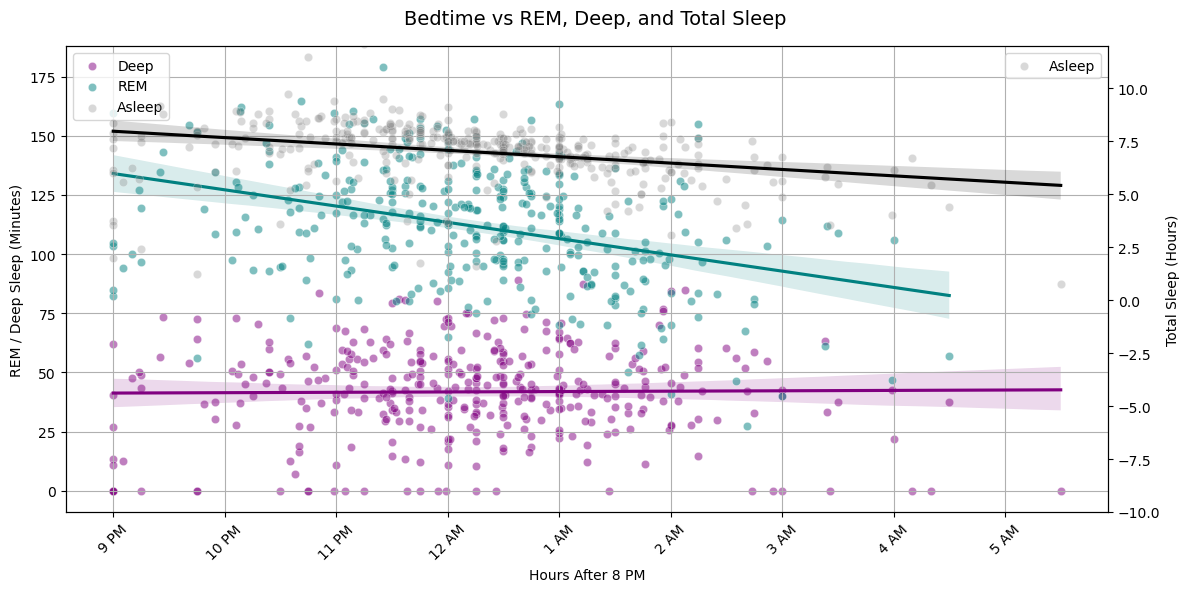

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data: convert asleep from timedelta to minutes
rem_data = sleepdata_cleaned_no_trips[sleepdata_cleaned_no_trips['REM_mins'] > 0]

# Set up figure and main axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary axis for deep and REM
sns.scatterplot(
    x='bedTime_hours_past_9pm', y='deep_mins', data=sleepdata_cleaned_no_trips,
    color='purple', alpha=0.5, label='Deep', ax=ax1
)
sns.regplot(
    x='bedTime_hours_past_9pm', y='deep_mins', data=sleepdata_cleaned_no_trips,
    scatter=False, color='purple', ax=ax1
)

sns.scatterplot(
    x='bedTime_hours_past_9pm', y='REM_mins', data=rem_data,
    color='teal', alpha=0.5, label='REM', ax=ax1
)
sns.regplot(
    x='bedTime_hours_past_9pm', y='REM_mins', data=rem_data,
    scatter=False, color='teal',  ax=ax1
)

ax1.set_xlabel('Hours After 8 PM')
ax1.set_ylabel('REM / Deep Sleep (Minutes)')
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_labels, rotation=45)
ax1.grid(True)

# Secondary axis for total sleep (asleep)
ax2 = ax1.twinx()
sns.scatterplot(
    x='bedTime_hours_past_9pm', y='asleep', data=sleepdata_cleaned_no_trips,
    color='gray', alpha=0.3, label='Asleep', ax=ax2
)
sns.regplot(
    x='bedTime_hours_past_9pm', y='asleep', data=sleepdata_cleaned_no_trips,
    scatter=False, color='black', ax=ax2
)
ax2.set_ylabel('Total Sleep (Hours)', color='black')
ax2.set_ylim((-10, 12))
ax2.tick_params(axis='y', labelcolor='black')

# Title and combined legend
fig.suptitle('Bedtime vs REM, Deep, and Total Sleep', fontsize=14)

# Combine legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


# Does previous day waketime affect sleep ?

In [90]:
sleepdata_cleaned_no_trips.tail()[['asleep', 'date', 'waketime']]
## get waketime day before 

,asleep,date,waketime
446,4.991667,2025-05-17,17/05/2025 10:00
447,6.041667,2025-05-18,18/05/2025 09:31
448,7.575000,2025-05-19,19/05/2025 08:52
449,8.791667,2025-05-20,20/05/2025 07:35
450,7.283333,2025-05-21,21/05/2025 08:47


# Effect of jet lag? 

Pull up dates of recent flights to and fro SG, and then plot the sleep, deep sleep, REM few days before to few days after, to see how sleep is affected 

In [40]:
date_to_sg = [x for x,y in singapore_trips]
date_to_uk = [y for x,y in singapore_trips]

## UK to SG: flying eastwards

In [41]:
## compare a week before and after -- using offset 
num_days = 7
week_offset = range(-num_days, num_days+1) ## it goes up till second value -1

dates_before_after_flight_to_sg = []
offset = []
for date in date_to_sg:
    for i in week_offset:
        date_of_interest = date + pd.Timedelta(days = i)
        dates_before_after_flight_to_sg.append(date_of_interest)
        offset.append(i)


In [56]:
dates_before_after_flight_to_sg_df = pd.DataFrame({'date' : dates_before_after_flight_to_sg, 
                                                   'offset':offset})
dates_before_after_flight_to_sg_df.head()
dates_before_after_flight_to_sg_df.tail()

,date,offset
55,2024-03-19,3
56,2024-03-20,4
57,2024-03-21,5
58,2024-03-22,6
59,2024-03-23,7


In [43]:
uk_to_sg = sleepdata_cleaned.merge(dates_before_after_flight_to_sg_df, on = 'date', how = 'inner')

In [58]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Filter data before and after the flight
# uk_before = uk_to_sg[uk_to_sg.offset < 0]
# sg_after = uk_to_sg[uk_to_sg.offset > 0]

# # Scatter points
# plt.figure(figsize=(10, 6))
# plt.scatter(uk_before.offset, uk_before.deep_mins, label='Before (UK)', color='royalblue')
# plt.scatter(sg_after.offset, sg_after.deep_mins, label='After (SG)', color='crimson')

# # Regression line: before flying
# b1, a1 = np.polyfit(uk_before.offset, uk_before.deep_mins, deg=1)
# x_before = np.arange(min(uk_before.offset) - 1, max(uk_before.offset) + 2)
# plt.plot(x_before, a1 + b1 * x_before, color='skyblue', linestyle='--', linewidth=2)

# # Regression line: after arriving
# b2, a2 = np.polyfit(sg_after.offset, sg_after.deep_mins, deg=1)
# x_after = np.arange(min(sg_after.offset) - 1, max(sg_after.offset) + 2)
# plt.plot(x_after, a2 + b2 * x_after, color='darkred', linestyle='--', linewidth=2)

# # Add vertical line to mark transition
# plt.axvline(x=0, color='darkorange', linestyle='dashed', linewidth=2, label='Flight Day')

# # Beautify plot
# plt.title('Deep Sleep Trends: Flying UK → SG (Eastwards)', fontsize=14)
# plt.xlabel('Day Offset (from flight day)', fontsize=12)
# plt.ylabel('Deep Sleep Minutes', fontsize=12)
# plt.xticks(np.arange(int(min(uk_to_sg.offset)), int(max(uk_to_sg.offset)) + 1, 1))
# plt.grid(alpha=0.3)
# plt.legend()
# plt.tight_layout()
# plt.show()


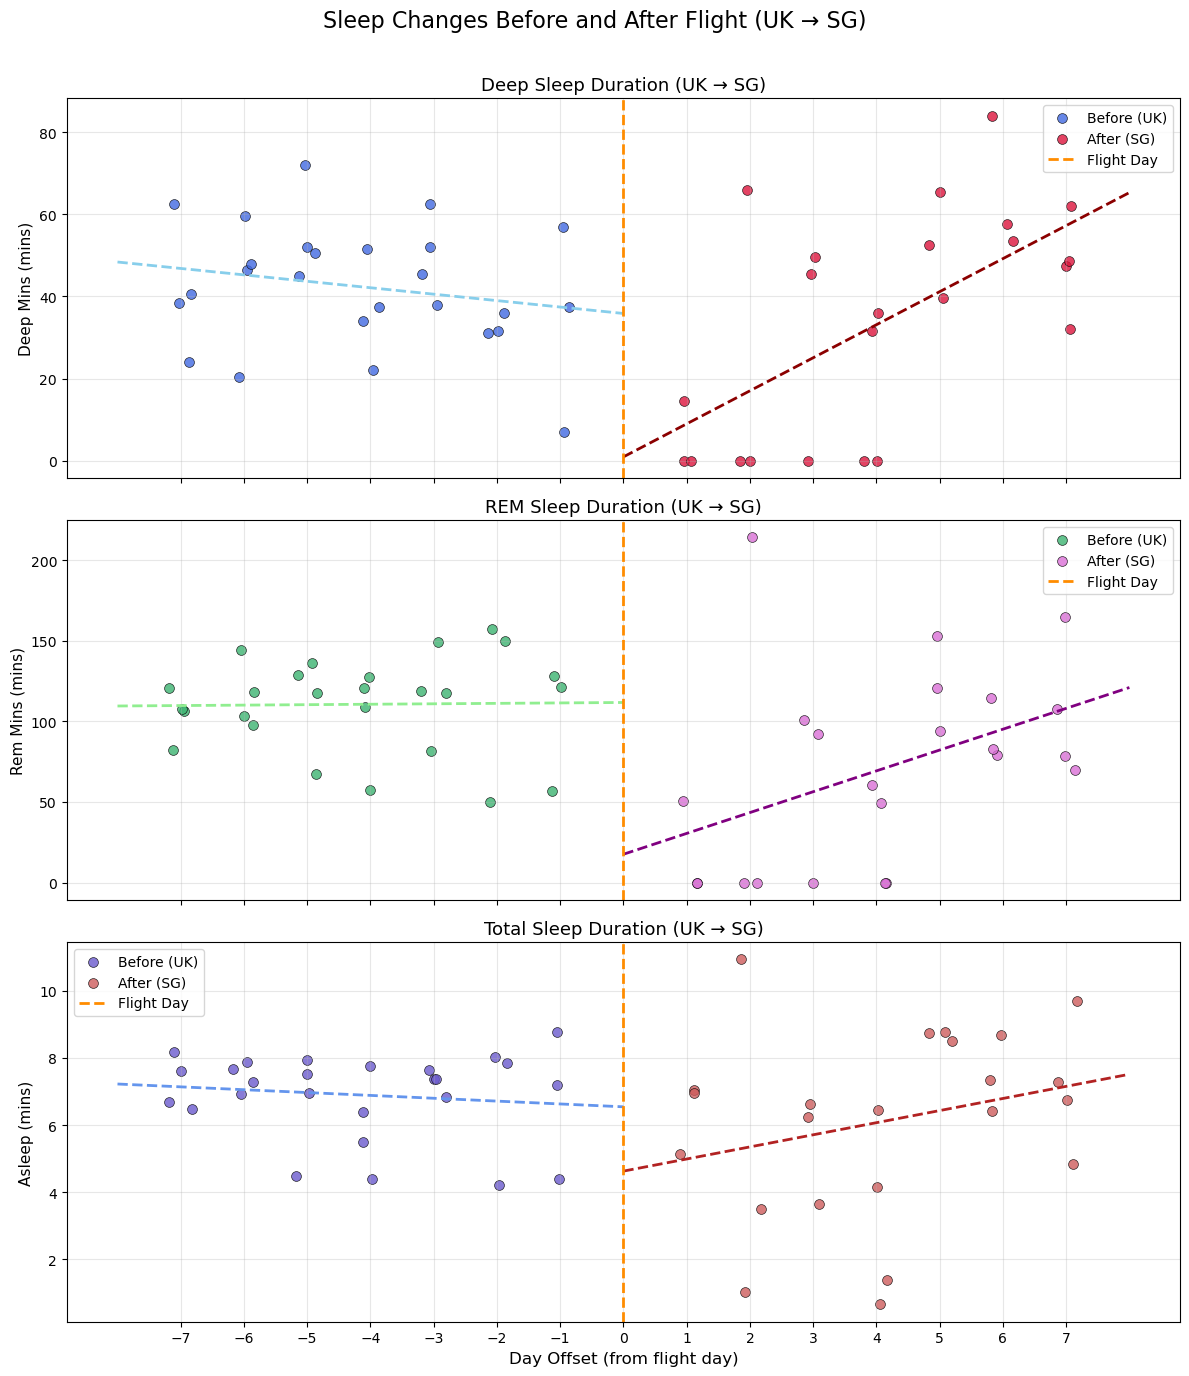

In [83]:
# Filter data before and after the flight
uk_before = uk_to_sg[uk_to_sg.offset < 0]
sg_after = uk_to_sg[uk_to_sg.offset > 0]

# Setup 3x1 subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 14), sharex=True)

# Plotting function for reuse
def plot_sleep_trend(ax, y_col, title, color_before, color_after, line_before, line_after, 
                     jitter_strength=0.15, hours = False, data_before = uk_before, data_after = sg_after):
    # Add jitter to x-values
    x_before_jittered = data_before.offset + np.random.uniform(-.2, 0.2, size=len(data_before))
    x_after_jittered = data_after.offset + np.random.uniform(-.2, .2, size=len(data_after))


    # Scatter with jitter
    ax.scatter(
        x_before_jittered, data_before[y_col],
        label='Before (UK)', color=color_before,
        edgecolors='k', linewidth=0.5, s=50, alpha=0.8
    )
    ax.scatter(
        x_after_jittered, data_after[y_col],
        label='After (SG)', color=color_after,
        edgecolors='k', linewidth=0.5, s=50, alpha=0.8
    )

    # Regression: use original x values (not jittered)
    b1, a1 = np.polyfit(data_before.offset, data_before[y_col], deg=1)
    x_before = np.arange(min(data_before.offset) - 1, max(data_before.offset) + 2)
    ax.plot(x_before, a1 + b1 * x_before, color=line_before, linestyle='--', linewidth=2)

    b2, a2 = np.polyfit(data_after.offset, data_after[y_col], deg=1)
    x_after = np.arange(min(data_after.offset) - 1, max(data_after.offset) + 2)
    ax.plot(x_after, a2 + b2 * x_after, color=line_after, linestyle='--', linewidth=2)

    # Vertical flight day line
    ax.axvline(x=0, color='darkorange', linestyle='dashed', linewidth=2, label='Flight Day')

    # Labels and legend
    ax.set_title(title, fontsize=13)
    time_unit = 'mins' if not hours else 'hrs'
    ax.set_ylabel(f'{y_col.replace("_", " ").title()} ({time_unit})', fontsize=11)
    ax.grid(alpha=0.3)
    ax.legend()


# 1. Deep sleep
plot_sleep_trend(
    axes[0], 'deep_mins', 'Deep Sleep Duration (UK → SG)',
    'royalblue', 'crimson', 'skyblue', 'darkred'
)

# 2. REM sleep
plot_sleep_trend(
    axes[1], 'REM_mins', 'REM Sleep Duration (UK → SG)',
    'mediumseagreen', 'orchid', 'lightgreen', 'purple'
)

# 3. Total sleep
plot_sleep_trend(
    axes[2], 'asleep', 'Total Sleep Duration (UK → SG)',
    'slateblue', 'indianred', 'cornflowerblue', 'firebrick', True
)

# Shared x-axis
axes[2].set_xlabel('Day Offset (from flight day)', fontsize=12)
plt.xticks(np.arange(int(min(uk_to_sg.offset)), int(max(uk_to_sg.offset)) + 1, 1))

plt.suptitle('Sleep Changes Before and After Flight (UK → SG)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


## SG to UK: flying westwwards

In [71]:
dates_before_after_flight_to_uk = []
offset = []
for date in date_to_uk:
    for i in week_offset:
        date_of_interest = date + pd.Timedelta(days = i)
        dates_before_after_flight_to_uk.append(date_of_interest)
        offset.append(i)

dates_before_after_flight_to_uk_df = pd.DataFrame({'date' : dates_before_after_flight_to_uk, 
                                                   'offset':offset})

## take the correct subset 
sg_to_uk = sleepdata_cleaned.merge(dates_before_after_flight_to_uk_df, on = 'date', how = 'inner')

In [74]:
# Filter data before and after the flight
sg_before = sg_to_uk[sg_to_uk.offset < 0]
uk_after = sg_to_uk[sg_to_uk.offset > 0]



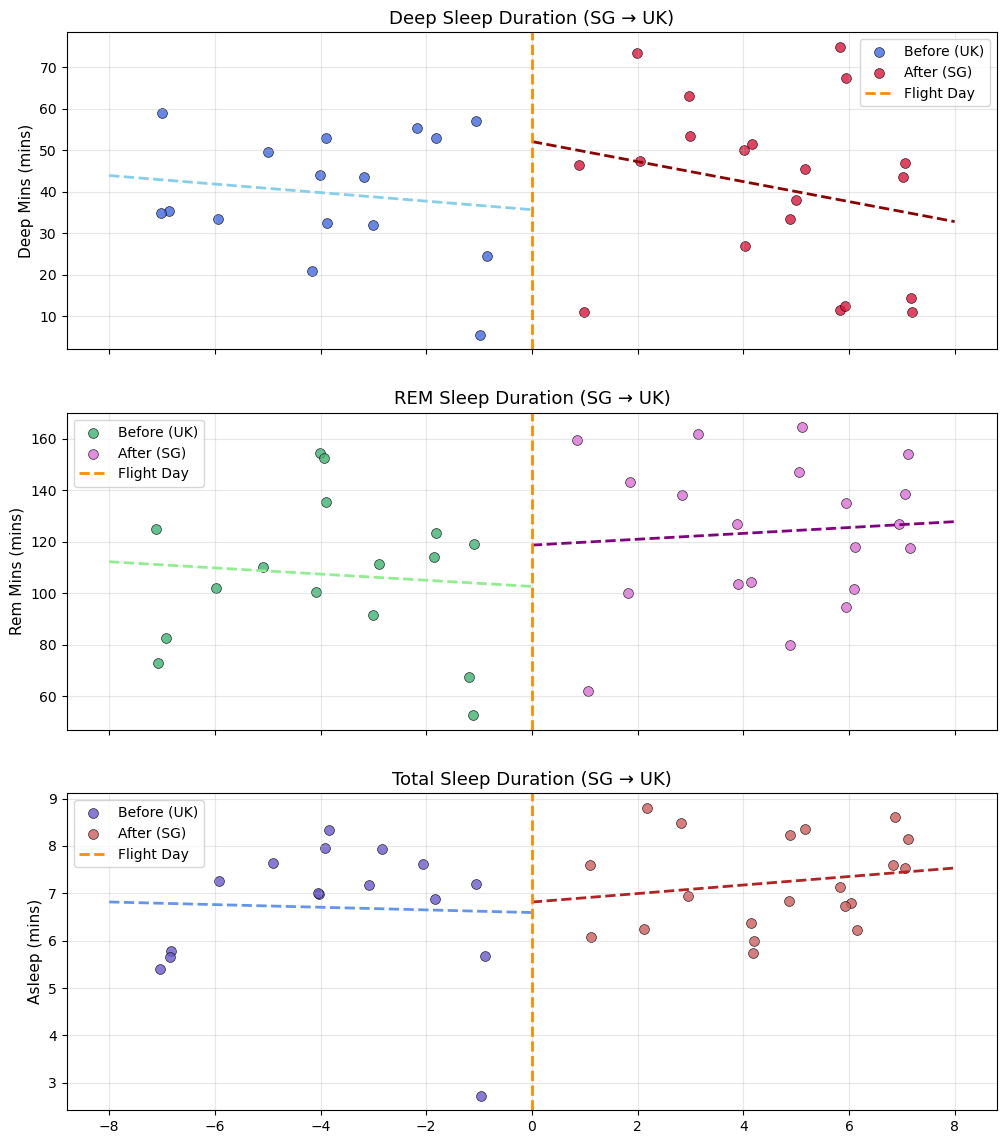

In [85]:
# Setup 3x1 subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 14), sharex=True)

plot_sleep_trend(
    axes[0], 'deep_mins', 'Deep Sleep Duration (SG → UK)',
    'royalblue', 'crimson', 'skyblue', 'darkred', 
    data_before= sg_before,
    data_after= uk_after
)

# 2. REM sleep
plot_sleep_trend(
    axes[1], 'REM_mins', 'REM Sleep Duration (SG → UK)',
    'mediumseagreen', 'orchid', 'lightgreen', 'purple', 
    data_before= sg_before,
    data_after= uk_after
)

# 3. Total sleep
plot_sleep_trend(
    axes[2], 'asleep', 'Total Sleep Duration (SG → UK)',
    'slateblue', 'indianred', 'cornflowerblue', 'firebrick', True, 
    data_before= sg_before,
    data_after= uk_after
)
